In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import layers
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import regularizers
from keras.models import Sequential,Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import keras
keras.__version__

'2.3.1'

In [15]:
!pip install pycaret
from pycaret.classification import *

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary()

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Admin\Desktop\1. Aliya Thesis\DATASET\Bluetooth\MergedFinal1.csv", header=None)

print("Read {} rows.".format(len(df)))

df.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

df.columns = [
     'Frame_length_stored_into_the_capture_file_per_100msec',
     'Length_per_100msec',
   'L2CAP_count_per_100msec',
   'HCI_ACL_count_per_100msec',
  'HCI_EVT_count_per_100msec',
   'Received_count_per_100msec',
    'Sent_count_per_100msec',
    'Command_Complete_count_per_100msec',
    'Disconnect_complete_count_per_100msec',
     'outcome'
]

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
encode_numeric_zscore(df, 'Frame_length_stored_into_the_capture_file_per_100msec')
encode_numeric_zscore(df, 'Length_per_100msec')
encode_numeric_zscore(df, 'L2CAP_count_per_100msec')
encode_numeric_zscore(df, 'HCI_ACL_count_per_100msec')
encode_numeric_zscore(df, 'HCI_EVT_count_per_100msec')
encode_numeric_zscore(df, 'Received_count_per_100msec')
encode_numeric_zscore(df, 'Sent_count_per_100msec')
encode_numeric_zscore(df, 'Command_Complete_count_per_100msec')
encode_numeric_zscore(df, 'Disconnect_complete_count_per_100msec')

In [ ]:
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [ ]:
 Create a test/train split.  25% test
# Split into train/test
from tensorflow.keras.callbacks import EarlyStopping

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
batch_size = 100
epochs = 5

# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) # gives 99 accuracy

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1
           )

#model.compile(loss='cross_entropy', optimizer = 'sgd', metrics=['accuracy'])
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
#model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size=batch_size, callbacks=[monitor],verbose=2,epochs=100)


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

#without Z-score conversion = training accuracy 0.7933, Training Loss:0.5208
#without Z-score conversion = testing accuracy 0.79943, Training Loss:0.50028
#with Z-score conversion = training accuracy 0.9239, Training Loss:0.4998
#with Z-score conversion = testing accuracy 0.9500, Training Loss:0.455197


8541/8541 [==============================] - 0s 33us/step
Test loss: 0.021221970738475614
Test accuracy: 0.992506742477417


In [ ]:
# Measure accuracy
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
recall = recall_score(y_eval, pred, average="binary")
precision = precision_score(y_eval, pred , average="binary")
f1 = f1_score(y_eval, pred, average="binary")

print("Validation score: {}".format(score))
print("Recall score: {}".format(recall))
print("Precision score: {}".format(precision))
print("F1 score: {}".format(f1))

In [ ]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
# fit model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_eval, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6828
           1       1.00      0.99      1.00      1713

   micro avg       1.00      1.00      1.00      8541
   macro avg       1.00      1.00      1.00      8541
weighted avg       1.00      1.00      1.00      8541



In [38]:
cnf_matrix = metrics.confusion_matrix(y_eval, pred)
cnf_matrix

array([[6826,    2],
       [   9, 1704]], dtype=int64)

NameError: name 'ax' is not defined

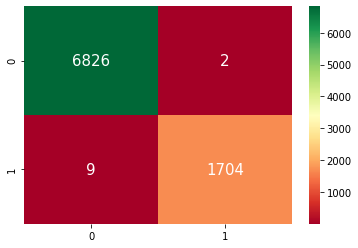

In [40]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn" ,fmt='d', annot_kws={"size": 15})
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label', )
plt.xlabel('Predicted label')

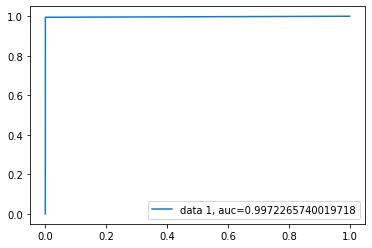

In [41]:
fpr, tpr, _ = metrics.roc_curve(y_eval, pred)
auc = metrics.roc_auc_score(y_eval, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:

from matplotlib import pyplot

## Performance Plot
train_times={
    'Isolation Forest': 4.38,
    'KMeans':20.9,
    'LOF':2.06,
    'OneClass SVM': 21.4
}

prediction_times={
    'Isolation Forest':34.2,
    'KMeans':0.052,
    'LOF':0.00368,
    'OneClass SVM': 71
}

Text(0.5, 0, 'Time in seconds')

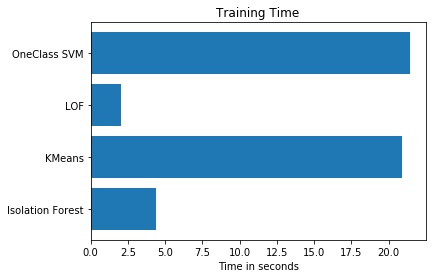

In [45]:
pyplot.title('Training Time')
pyplot.barh(range(len(train_times)), list(train_times.values()), align='center')
pyplot.yticks(range(len(train_times)), list(train_times.keys()))
pyplot.xlabel('Time in seconds')

Text(0.5, 0, 'Time in seconds')

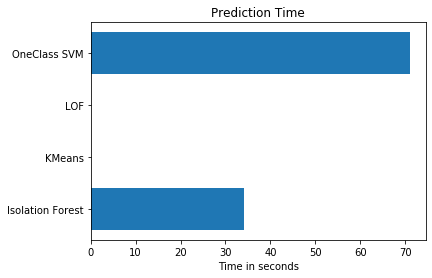

In [46]:
pyplot.title('Prediction Time')
pyplot.barh(range(len(prediction_times)), list(prediction_times.values()), align='center')
pyplot.yticks(range(len(prediction_times)), list(prediction_times.keys()))
pyplot.xlabel('Time in seconds')

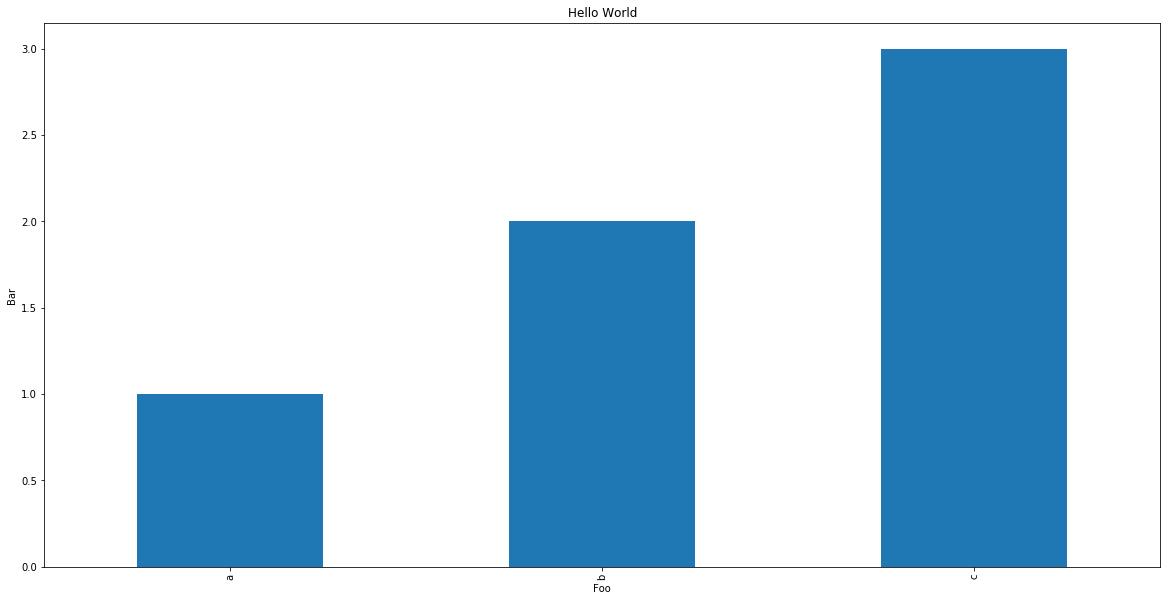

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

s = pd.Series([1,2,3], index=['a','b','c'])

s.plot.bar(figsize=(20,10))
plt.xlabel('Foo')
plt.ylabel('Bar')
plt.title("Hello World");

In [ ]:
clf1 = setup(train_data, target = 'Survived', ignore_features = ['Ticket', 'Name', 'PassengerId'], silent = True, session_id = 786) 